## **Create a Python project to guess a number that has been randomly selected.**

### You may use any libraries, sorcery or code with a buddy. Have fun with this and get creative! If you have extra time, try to improve your code as much as possible. 

In [114]:
# Libraries
import random
import numpy as np
from math import sqrt

In [120]:
# Situation Analysis Functions
# Get distance, store distance history (guess), calculate the probability 
def distance(a,b):
    return(sqrt(a**2+b**2))

class guesser():
    def __init__(self, starting_magnitude):
        self.initial_guess = [get_num(starting_magnitude) for _ in range(2)]
        self.guess_history = self.initial_guess
        self.dist_history = []
        
    def guess(self):
        d1 = abs(self.dist_history[-1])
        d2 = abs(self.dist_history[-2])
        
        guess_mag = d2/(d1+d2)
        guess_dir = np.sign(d2-d1)
        
        new_guess = guess_mag*guess_dir*self.guess_history[-1] + self.guess_history[-1]
    
        self.guess_history.append(new_guess)
        
    def learn(self, goal):
        self.dist_history.append(distance(self.guess_history[-1], goal))
    
    def init_learn(self, goal):
        for guess in self.guess_history:
            self.dist_history.append(distance(guess, goal))

In [121]:
# Generate a random number
def get_num(max_size):
    return random.randint(1,max_size)

In [134]:
rnum = get_num(100000)

In [135]:
# Set up the player
player = guesser(starting_magnitude=100000)
player.init_learn(rnum)

C:\Users\vince\Anaconda3\envs\datasc\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


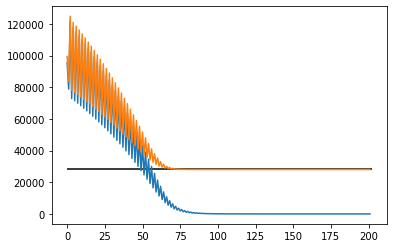

In [136]:
for _ in range(200):
    player.guess()
    player.learn(rnum)
    
import matplotlib.pyplot as plt
plt, ax = plt.subplots()
ax.plot(player.guess_history)
ax.plot(player.dist_history)
ax.hlines(rnum, 0, len(player.guess_history))
plt.show()

**Don't know if this qualifies as bayesian learning as it's only updating at the edge, not using all the information available**

Loss function effectively finds the number